<a href="https://colab.research.google.com/github/omaima-9/NLP/blob/main/CNN_BLSTM_With_Seg_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Install Dependencies and Bring in Data

In [1]:
!pip install tensorflow tensorflow-gpu pandas matplotlib sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.8/511.8 MB 3.6 MB/s eta 0:00:00
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=a43b811e9b54e952505690334e2da382f4c65e499ebab032060685f40b7c12e1
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [2]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [ ]:
df = pd.read_excel('LabeledDataset.xlsx')
df=df.drop(columns=['Index'])

In [ ]:
df

In [ ]:
df2 = pd.read_csv("OSACT2020-sharedTask-train.txt",  delimiter = "\t")
df2.columns=["Text", "Off_Label", "HS_Label"]
df2

,Text,Off_Label,HS_Label
0,فدوه يا بخت فدوه يا زمن واحد منكم يجيبه,NOT_OFF,NOT_HS
1,RT @USER: يا رب يا واحد يا أحد بحق يوم الاحد ا...,OFF,HS
2,RT @USER: #هوا_الحرية يا وجع قلبي عليكي يا امي...,NOT_OFF,NOT_HS
3,يا بكون بحياتك الأهم يا إما ما بدي أكون 🎼,NOT_OFF,NOT_HS
4,@USER اخخ يا قلببي يا هالحلقه 😩😭♥️ متعه على بك...,NOT_OFF,NOT_HS
...,...,...,...
6833,@USER يا حمار ، يا جاهل ، نسبة الباطل ما بتتحس...,OFF,NOT_HS
6834,RT @USER: @USER كل زق يا طاقية يا واطي يا حقير...,OFF,NOT_HS
6835,@USER<LF>يا كبير يا ممتع يا نجم لابد أن تعي جي...,NOT_OFF,NOT_HS
6836,يا رب الاتحاد يفوز يا رب. 😭😭 #الاتحاد_النصر,NOT_OFF,NOT_HS


In [ ]:
df3 = pd.read_csv("OSACT2020-sharedTask-dev.txt",  delimiter = "\t")
df3.columns=["Text", "Off_Label", "HS_Label"]
df3

,Text,Off_Label,HS_Label
0,RT @USER: وعيون تنادينا تحايل فينا و نقول يا ع...,NOT_OFF,NOT_HS
1,يا بلادي يا أم البلاد يا بلادي بحبك يا مصر بحب...,NOT_OFF,NOT_HS
2,RT @USER: يا رب يا قوي يا معين مدّني بالقوة و ...,NOT_OFF,NOT_HS
3,RT @USER: رحمك الله يا صدام يا بطل ومقدام. URL,NOT_OFF,NOT_HS
4,يا جابر يا بنجرجي يا مرتزق يا حثالة الحمدين يا...,OFF,HS
...,...,...,...
994,RT @USER: انتو بتوزعوا زيت وسكر فعلا يا عباس؟<...,NOT_OFF,NOT_HS
995,RT @USER: كدا يا عمر متزعلهاش يا حبيبي 😂 URL,NOT_OFF,NOT_HS
996,هدا سكن اطفال امارتين من شارقة طالبين فزعتكم ي...,NOT_OFF,NOT_HS
997,RT @USER: ومدني بمدد من قوتك أواجه به ضعفي.. و...,NOT_OFF,NOT_HS


In [ ]:
df3["Off_Label"].value_counts() 

NOT_OFF    820
OFF        179
Name: Off_Label, dtype: int64

In [ ]:
df2.drop_duplicates()

,Text,Off_Label,HS_Label
0,فدوه يا بخت فدوه يا زمن واحد منكم يجيبه,NOT_OFF,NOT_HS
1,RT @USER: يا رب يا واحد يا أحد بحق يوم الاحد ا...,OFF,HS
2,RT @USER: #هوا_الحرية يا وجع قلبي عليكي يا امي...,NOT_OFF,NOT_HS
3,يا بكون بحياتك الأهم يا إما ما بدي أكون 🎼,NOT_OFF,NOT_HS
4,@USER اخخ يا قلببي يا هالحلقه 😩😭♥️ متعه على بك...,NOT_OFF,NOT_HS
...,...,...,...
6833,@USER يا حمار ، يا جاهل ، نسبة الباطل ما بتتحس...,OFF,NOT_HS
6834,RT @USER: @USER كل زق يا طاقية يا واطي يا حقير...,OFF,NOT_HS
6835,@USER<LF>يا كبير يا ممتع يا نجم لابد أن تعي جي...,NOT_OFF,NOT_HS
6836,يا رب الاتحاد يفوز يا رب. 😭😭 #الاتحاد_النصر,NOT_OFF,NOT_HS


In [ ]:
# Load train
df = pd.read_csv('LabeledDataset.csv')

df=df[['commentText','Label']]
df=df.drop_duplicates()
df

# 1. Preprocess

In [ ]:
!pip list
!git clone https://github.com/aub-mind/arabert


In [5]:
from tensorflow.keras.layers import TextVectorization
import re
!pip install pyarabic
!pip install farasapy
from arabert.preprocess import ArabertPreprocessor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 KB 14.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [110]:
model_name = "aubmindlab/bert-base-arabertv2"
arabert_prep = ArabertPreprocessor( model_name=model_name,
                                    remove_html_markup = False,
                                    replace_urls_emails_mentions = False,
                                    strip_tashkeel = True,
                                    strip_tatweel = True,
                                    insert_white_spaces = False,
                                    remove_non_digit_repetition = False,
                                    replace_slash_with_dash = None,
                                    map_hindi_numbers_to_arabic = True,
                                    apply_farasa_segmentation = None)

[2023-01-09 10:00:11,461 - farasapy_logger - WARNING]: Be careful with large lines as they may break on interactive mode. You may switch to Standalone mode for such cases.


In [111]:
def remove_prefix(text):
  prefix_list = [
    'ال',
    'و',
    'ف',
    'ب',
    'ك',
    'ل',
    'لل',
     'ه',
    'ها',
    'ك',
    'ي',
    'هما',
    'كما',
    'نا',
    'كم',
    'هم',
    'هن',
    'كن',
    'ا',
    'ان',
    'ين',
    'ون',
    'وا',
    'ات',
    'ت',
    'ن',
    'ة',
    'س'] 

  words = text.split()
  needed_words = []
  for w in words:
    if w not in (prefix_list):
      needed_words.append(w)
  filtered_sentence = ' '.join(needed_words)
  return filtered_sentence

def remove_emoji(text):
    emoji_pattern = re.compile('['
                           u'\U0001F600-\U0001F64F'  # emoticons
                           u'\U0001F300-\U0001F5FF'  # symbols & pictographs
                           u'\U0001F680-\U0001F6FF'  # transport & map symbols
                           u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
                           u'\U00002702-\U000027B0'
                           u'\U000024C2-\U0010FFFF'  # wider range
                           ']+', flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [112]:
def Pre_processing(comment):

  pat1 = '@[^ ]+' # Remove mentions
  pat2 = '#'      #
  pat3 = '[0-9]'  #remove Number
  pat4 = '[A-Za-z]' #remove english charctares
  combined_pat = '|'.join((pat1, pat2, pat3, pat4))
  comment = re.sub(combined_pat, '', comment)
  comment = re.sub('[ى]', 'ي', comment)
  comment = re.sub('[إأٱآا]', 'ا', comment)
  comment = re.sub('[ؤئ]', 'ء', comment)
  comment = re.sub('[ة]', 'ه', comment)
  comment = re.sub('[\n]', ' ', comment)
  comment = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), '', comment)  # remove punctuation
  comment=re.sub(r'(.)\1+', r'\1', comment) # remove repeated char like هههه  


  comment=remove_emoji(comment)

  comment=arabert_prep.preprocess(comment)
  comment = re.sub('[+]', '', comment)
  comment=remove_prefix(comment)
  
  return comment

In [123]:
clean_df=df.copy()
for i in range(15051):
  try:
    commentText=clean_df['commentText'][i]
    commentText=Pre_processing(commentText)
    clean_df['commentText'][i]=commentText
  except:
    commentText

In [ ]:
clean_df= clean_df.dropna()
clean_df=clean_df.drop_duplicates()
clean_df


In [125]:
clean_df["Label"].value_counts() 

N    6172
P    4600
Name: Label, dtype: int64

In [126]:
6180-4652
6172-4600

1572

In [127]:
from sklearn.preprocessing import LabelEncoder

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(clean_df['Label'])
clean_df['Label'] = encoder.transform(clean_df['Label'])
clean_df

,commentText,Label
0,شمس مثقف جميل وايد أحلام هع ما أقول,1
1,أحلام حبي أكثر لان انظلم كثير من ناس هي امرا ق...,0
2,كبرلفك اله دايضحكون عليج,0
3,اله كلام صحيح عن شمس,0
4,ذكرى ما نسي ما حد ينسي صوت جميل طيب قدر غير مو...,0
...,...,...
15044,ماذا نتظر من واحد مسيحي عاهر تفو علي هي أشكال ...,1
15045,مغرور تاليتج ياكلج دود,1
15046,معقول رامز كلب يعمل هالمقلب سير هذا إعدام قليل حق,1
15048,حبا بس مقطع رقم خلا قزره,1


In [128]:
clean_df.sample(frac = 1)['Label'][7000:10000].value_counts()

0    1709
1    1291
Name: Label, dtype: int64

In [129]:
clean_df=clean_df.sample(frac = 1)

In [132]:
clean_df["Label"][:7000].value_counts() 

0    3982
1    3018
Name: Label, dtype: int64

In [133]:
X = clean_df['commentText'].values
y = clean_df['Label'].values

In [134]:
!pip install transformers
from transformers import AutoTokenizer, AutoModel


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 67.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 96.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 24.5 MB/s eta 0:00:00


In [135]:
tokenizer = AutoTokenizer.from_pretrained( "aubmindlab/bert-base-arabertv2")

Downloading:   0%|          | 0.00/611 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/384 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/720k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.31M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
m=np.zeros(800)
inputs= np.array(tokenizer(str(t), padding=True,
                    return_tensors='pt',truncation=False, max_length=800)['input_ids'][0] )

# m[:inputs.shape[0]-2]=inputs[1:-1]

In [ ]:
inputs.astype(int)


array([   33,  1412, 16872, 29988,   288,   880,   223,  4630, 30670,
         165, 34375,   165,   369,   298,  8740,   165,   460,    34])

In [136]:
from tensorflow.python.ops import tensor_array_ops

toke=[]
for sentence in X:
  m=np.zeros(800)
  inputs= np.array(tokenizer(str(sentence), padding=True,
                    return_tensors='pt',truncation=False, max_length=800)['input_ids'][0] )
  m[:inputs.shape[0]-2]=inputs[1:-1]
  toke.append(m.astype(int))
# tokenized=(tokenizer.encode_plus(str(sentence), return_tensors='pt')['input_ids'][0] for sentence in clean_df.commentText)


/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2354: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2354: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(


In [ ]:
print(toke[0])

In [138]:
tokenized_text = tf.convert_to_tensor(toke)

In [139]:
len(tokenized_text)

10772

In [140]:
MAX_FEATURES = 200000 # number of words in the vocab

In [141]:
type(X)

numpy.ndarray

In [142]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((tokenized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(16000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

In [ ]:
dataset.snapshot

<bound method DatasetV2.snapshot of <PrefetchDataset element_spec=(TensorSpec(shape=(None, 800), dtype=tf.int32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>>

In [143]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

# 2. Create Sequential Model

In [144]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding, Conv1D, Attention 

In [ ]:
# CNN, LSTM, BLSTM, attention BLSTM

In [145]:
model = Sequential()
# Create the embedding layer 
model.add(Embedding(MAX_FEATURES+1, 200))
# Bidirectional LSTM Layer
model.add(Conv1D(128,5,activation='relu'))
# model.add(LSTM(32, activation='tanh'))
model.add(Bidirectional(LSTM(32, activation='tanh')))

# model.add(LSTM(32, activation='tanh'))
# model.add(GlobalMaxPooling1D())

# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer 
model.add(Dense(1, activation='sigmoid'))

In [146]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam',metrics=['accuracy'])

In [147]:
# model.build(train) # `input_shape` is the shape of the input data


In [148]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 200)         40000200  
                                                                 
 conv1d (Conv1D)             (None, None, 128)         128128    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               41216     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                        

In [149]:
history = model.fit(train, epochs=5, validation_data=val)

Epoch 1/5
471/471 [==============================] - 43s 67ms/step - loss: 0.5006 - accuracy: 0.7454 - val_loss: 0.3040 - val_accuracy: 0.8937
Epoch 2/5
471/471 [==============================] - 30s 64ms/step - loss: 0.2867 - accuracy: 0.8846 - val_loss: 0.1649 - val_accuracy: 0.9338
Epoch 3/5
471/471 [==============================] - 31s 66ms/step - loss: 0.1756 - accuracy: 0.9301 - val_loss: 0.0912 - val_accuracy: 0.9701
Epoch 4/5
471/471 [==============================] - 30s 64ms/step - loss: 0.1052 - accuracy: 0.9655 - val_loss: 0.0659 - val_accuracy: 0.9753
Epoch 5/5
471/471 [==============================] - 31s 66ms/step - loss: 0.0634 - accuracy: 0.9802 - val_loss: 0.0294 - val_accuracy: 0.9907


In [150]:
from matplotlib import pyplot as plt

<Figure size 576x360 with 0 Axes>

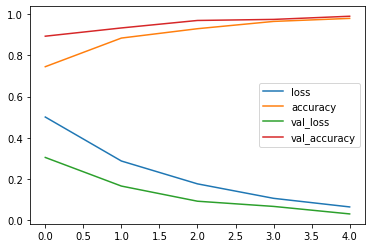

In [151]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

# 3. Make Predictions

In [ ]:
input_text = vectorizer('شكلها زي الحيوان')
# input_text

In [ ]:
res = model.predict(np.array([input_text]))

1/1 [==============================] - 1s 906ms/step


In [ ]:
(np.rint(res)).astype(int)

array([[0]])

In [ ]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [ ]:
len(batch_X)

16

In [ ]:
(model.predict(batch_X) > 0.5).astype(int)

In [ ]:
res

array([[0.2216914]], dtype=float32)

# 4. Evaluate Model

In [152]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [153]:
from sklearn.metrics import f1_score
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()


In [ ]:
t=[]
p=[]
for batch in test.as_numpy_iterator(): 

    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat =(np.rint(model.predict(X_true))).astype(int)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    t=np.concatenate((t,y_true), axis=None)
    p=np.concatenate((p,yhat), axis=None)
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)
    f1_score(y_true,yhat)

In [155]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()},F1_score:{f1_score(t,p)}')

Precision: 0.9771167039871216, Recall:0.9884259104728699, Accuracy:0.9402984976768494,F1_score:0.9827387802071346


# 5. Test and Gradio

In [ ]:
!pip install gradio jinja2

In [ ]:
import tensorflow as tf
import gradio as gr

In [ ]:
model.save('toxicity.h5')

In [ ]:
model = tf.keras.models.load_model('toxicity.h5')

In [ ]:
m=np.zeros(800)
inputs= np.array(tokenizer(('ههههه قليلة ادب'), padding=True,
                    return_tensors='pt',truncation=False, max_length=800)['input_ids'][0] )
m[:inputs.shape[0]-2]=inputs[1:-1]

In [ ]:
input_str =m

In [ ]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 0s 73ms/step


In [ ]:
res

array([[0.04696819]], dtype=float32)

In [ ]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    text = '{}: {}'.format("Label",(np.rint(results)).astype(int))
    
    return text

In [ ]:
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

In [ ]:
interface.launch(share=True)